# Análise Estatística de viagens de Taxi

Segue aqui um projeto de Análise de dados, feito com bancos de dados com informações sobre viagens de Taxi.

## Iniciação

- Carregando pandas para o manejo do banco de dados
- Statistics para cálculos de estatística
- Datetime para formatação das datas na coluna referente ao dia no calendário
- Alpha como nível crítico de significância estatística genérico mais aceito pela estatística, 5% por não ser tão rígido ao comparar a diferença das médias, mas ainda esta probabilidade é claramente muito suficiente para concluir que há uma diferença significativa entre os valores médios testados.

In [2]:
import pandas as pd
import statistics
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats as st
alpha=0.05

- Carregando Dataframes

In [3]:
df_trips= pd.read_csv('/datasets/project_sql_result_01.csv. ')
df_temp= pd.read_csv('/datasets/project_sql_result_04.csv.')
df_last= pd.read_csv('/datasets/project_sql_result_07.csv')

In [4]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


# Observando informações gerais do banco de dados
### Dados:

#### df_trips:
- company_name: Nome da companhia.
- trips_amount: Quantidade de viagens por companhia.

#### df_temp:
- dropoff_location_name: Bairro de destino da viagem.
- average_trips: Quantidade de viagens por destino.

#### df_last:
- start_ts: data e hora de coleta
- weather_conditions: condições meteorológicas no momento em que a corrida começou
- duration_seconds: duração da corrida em segundos

#### Corrigindo tipo de dado da data para datetime64[ns] e possibilitar futuras análises envolvendo o dia.

In [7]:
df_last.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [8]:
df_last.start_ts=pd.to_datetime(df_last.start_ts, format='%Y-%m-%d %H:%M:%S')

In [9]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


#### Analisando quais bairros são mais frequentes como destinos.

In [10]:
df_temp.sort_values(by='average_trips', ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


#### Analisando quais companhias de taxi são mais usadas.

In [11]:
df_trips.sort_values(by='trips_amount', ascending=False).head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


### Observando distribuição de viagens ao longo dos destinos:

Text(0.5, 1.0, 'Destinos')

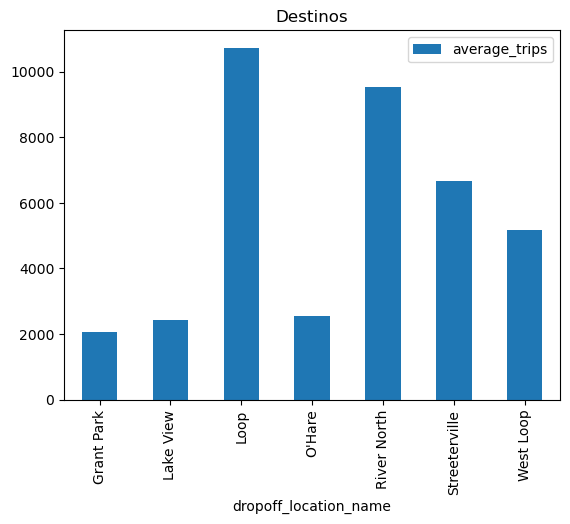

In [12]:
pivot_location=df_temp[df_temp['average_trips']>2000].pivot_table(index=['dropoff_location_name'], values='average_trips', aggfunc='sum')
pivot_location.plot(kind='bar')
plt.title('Destinos')

### Observando distribuição de viagens ao longo das companhias de Taxi:

Text(0.5, 1.0, 'Companhias de Taxi')

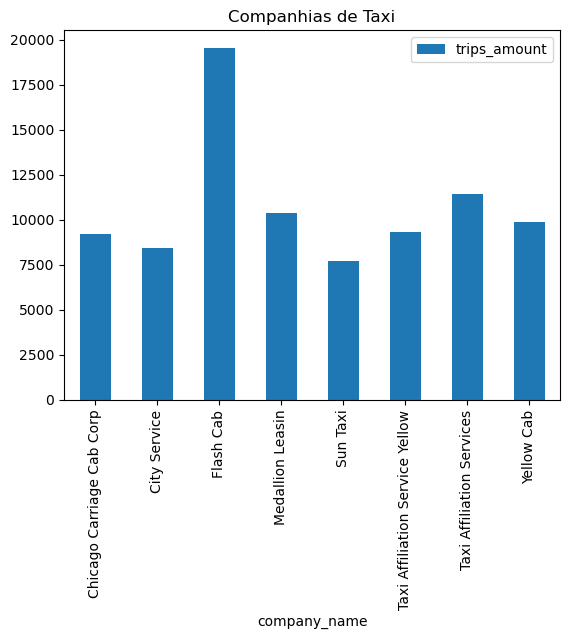

In [13]:
pivot_location=df_trips[df_trips['trips_amount']>7500].pivot_table(index=['company_name'], values='trips_amount', aggfunc='sum')
pivot_location.plot(kind='bar')
plt.title('Companhias de Taxi')

## Enriquecendo dados
Adicionando dia da semana em df_last para possibilitar o teste de hipótese comparando a duração das viagens do Loop para o Aeroporto Internacional O'Hare com o mesmo trajeto, porém em um sabado chuvoso.

In [14]:
df_last['week_day']=(df_last['start_ts'].dt.weekday)
#Criando coluna com dia da semana.

In [15]:
unlucky=df_last[df_last['week_day']==5][df_last['weather_conditions']=='Bad']
#Salvando em outra tabela as linhas de df_last que estavam no sábado com dia chuvoso.

In [16]:
significancia_temp=st.ttest_ind(unlucky['duration_seconds'], df_last['duration_seconds'])

#### Considerando a hipótese nula: As durações médias de viagens do bairro loop para o aeroporto em sábados chuvosos são iguais aos dias normais.
#### E a alternativa: As durações médias de viagens do bairro loop para o aeroporto em sábados chuvosos são diferentes das médias dos dias normais.

In [17]:
if significancia_temp.pvalue < alpha:
    print("Rejeitamos a hipótese nula, logo as durações médias de viagens do bairro loop para o aeroporto em sábados chuvosos são diferentes das médias dos dias normais.")
else:
    print("Nós não podemos rejeitar a hipótese nula, logo, as durações médias de viagens do bairro loop para o aeroporto em sábados chuvosos são iguais aos dias normais.") 

Rejeitamos a hipótese nula, logo as durações médias de viagens do bairro loop para o aeroporto em sábados chuvosos são diferentes das médias dos dias normais.


# Conclusão
## Dados Gerais

- A tabela estava com o tipo de dado incorreto em df_last.start_ts, a biblioteca datetime foi utilizada para corrigir o tipo de dado.

## Análise dos Dados

### Análise de todos os bairros:

- Os bairros com maior quantidade de número de corridas em que esse bairro é destino são: Loop, River North, Streeterville, WeestLoop.
- Flash Cab é a companhia mais usada entre os usuários.
- Os valores são muito discrepantes entre a quantidade de corrida por bairros e as companhias usadas pelos usuários, já que bairros como o do aeroporto são mais visitados por Taxis.

## Análise Estatística dos Dados

### Há diferença de duração de viagem para sábados chuvosos?

- De acordo com o ttest realizado, a amostra da população possuí diferência de média significativa para a duração, então as populações de sábados chuvosos e dias normais diferem significativamente em suas durações.
